In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# Reading in shark data
data = pd.read_csv("../data/clean_sharks.csv", usecols=['Fatal (Y/N)', 'Activity'])
data.tail()

,Activity,Fatal (Y/N)
1754,"Scuba diving, attempting to catch a captive shark",N
1755,Attempting to net shark in shark channel,N
1756,Spearfishing on Scuba,N
1757,Standing,N
1758,Fishing,N


In [4]:
# cleaning activity column
data['Activity'] = data['Activity'].str.lower()

# Remove non word charcter
data['Activity'] = data['Activity'].apply(lambda x : re.sub('([^a-zA-Z]+)', ' ', x))

data.tail()

,Activity,Fatal (Y/N)
1754,scuba diving attempting to catch a captive shark,N
1755,attempting to net shark in shark channel,N
1756,spearfishing on scuba,N
1757,standing,N
1758,fishing,N


In [5]:
# instanstiate vectorizer
vectorizer = CountVectorizer()
vectorizer

# vectorize activity
activity = data['Activity']
X = vectorizer.fit_transform(activity)
X

<1759x359 sparse matrix of type '<class 'numpy.int64'>'
	with 3030 stored elements in Compressed Sparse Row format>

In [6]:
# all of the unique words
features = vectorizer.get_feature_names_out().tolist()
features[:10]

['abalone',
 'abaone',
 'above',
 'accidentally',
 'adrift',
 'after',
 'air',
 'alacatraz',
 'albacore',
 'alongside']

In [7]:
# Count of each unique word and their frequency
vectorizer.vocabulary_

{'swimming': 303,
 'fishing': 106,
 'snorkeling': 270,
 'surfing': 299,
 'standing': 282,
 'boogie': 43,
 'boarding': 38,
 'wading': 339,
 'stand': 281,
 'up': 333,
 'paddleboarding': 200,
 'walking': 341,
 'in': 134,
 'surf': 295,
 'for': 113,
 'sharks': 253,
 'or': 192,
 'boardin': 37,
 'diving': 85,
 'body': 41,
 'water': 343,
 'with': 354,
 'seabirds': 243,
 'spearfishing': 274,
 'night': 181,
 'scuba': 241,
 'ascending': 18,
 'using': 335,
 'scooter': 240,
 'free': 114,
 'abalone': 0,
 'sitting': 261,
 'on': 188,
 'his': 126,
 'board': 36,
 'skindiving': 267,
 'floating': 109,
 'inner': 136,
 'tube': 327,
 'holding': 127,
 'shark': 251,
 'leader': 158,
 'dangling': 75,
 'it': 139,
 'above': 2,
 'the': 311,
 'treading': 325,
 'kayak': 148,
 'paddle': 198,
 'attempting': 22,
 'to': 316,
 'rescue': 222,
 'kayaking': 149,
 'stepped': 285,
 'splashing': 279,
 'lying': 165,
 'prone': 213,
 'submerged': 293,
 'wade': 338,
 'sittting': 262,
 'child': 60,
 'resting': 225,
 'clamming': 61,


In [8]:
X.shape

# We have 1759 rows of data, and 359 unique words (features)

(1759, 359)

In [9]:
# getting data ready for naive bayes
dataX = X.toarray()
Y = data['Fatal (Y/N)']

dataframe_X = pd.DataFrame(dataX, columns= features)
dataframe_X.head()

,abalone,abaone,above,accidentally,adrift,after,air,alacatraz,albacore,alongside,...,when,while,white,windsurfing,wing,with,wreckage,yards,yellowfin,zodiac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = dataframe_X
df.to_csv("../data/MN_NB_data.csv")
df['Fatal (Y/N)'] = Y
df.head()

,abalone,abaone,above,accidentally,adrift,after,air,alacatraz,albacore,alongside,...,while,white,windsurfing,wing,with,wreckage,yards,yellowfin,zodiac,Fatal (Y/N)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [11]:
# Test train split
trainMN , testMN = train_test_split(df, test_size=.4)

# save labels
trainMN_label = trainMN['Fatal (Y/N)']
testMN_label = testMN['Fatal (Y/N)']

# drop label column
trainMN = trainMN.drop(['Fatal (Y/N)'], axis=1)
testMN = testMN.drop(['Fatal (Y/N)'], axis=1)

print("Testing MN:", testMN.head(4))
print("Training MN:", trainMN.head(4))

Testing MN:      abalone  abaone  above  accidentally  adrift  after  air  alacatraz  \
312        0       0      0             0       0      0    0          0   
32         0       0      0             0       0      0    0          0   
806        0       0      0             0       0      0    0          0   
267        0       0      0             0       0      0    0          0   

     albacore  alongside  ...  when  while  white  windsurfing  wing  with  \
312         0          0  ...     0      0      0            0     0     0   
32          0          0  ...     0      0      0            0     0     0   
806         0          0  ...     0      0      0            0     0     0   
267         0          0  ...     0      0      0            0     0     0   

     wreckage  yards  yellowfin  zodiac  
312         0      0          0       0  
32          0      0          0       0  
806         0      0          0       0  
267         0      0          0       0  

[4 ro

In [12]:
# NB Model

MyMN = MultinomialNB()

MyMN_Model = MyMN.fit(trainMN, trainMN_label)

print(MyMN_Model.classes_)
print(MyMN_Model.class_count_)

# precti
Predictions_Mn = MyMN_Model.predict(testMN)
print("prediction:", Predictions_Mn)

['N' 'Y']
[1009.   46.]
prediction: ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'Y' 'N

In [13]:
# Print the actual probability
print(MyMN_Model.predict_proba(testMN))

print("Mean accruacy on the given test data and labels:", round(MyMN_Model.score(testMN, testMN_label),3))

[[0.996082   0.003918  ]
 [0.98981391 0.01018609]
 [0.98981391 0.01018609]
 ...
 [0.98856344 0.01143656]
 [0.996082   0.003918  ]
 [0.996082   0.003918  ]]
Mean accruacy on the given test data and labels: 0.947


[[665  10]
 [ 27   2]]


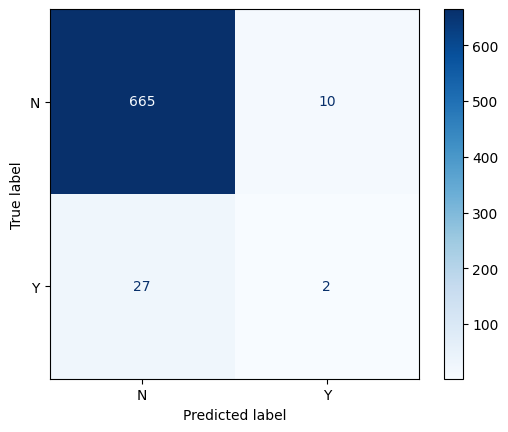

In [14]:
# Confusion matrix
Confusion = confusion_matrix(testMN_label, Predictions_Mn)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=MyMN_Model.classes_)
display.plot(cmap='Blues')
plt.show()
